## Grouping Similar Products Using Document Embeddings

NEEDS TO BE FINISHED


In this notebook, we aim to group similar products together based on their descriptions. To achieve this, we will create a data processing pipeline that leverages advanced natural language processing (NLP) techniques. The pipeline will involve the following steps:

1. **Data Preprocessing**: We will use the SpaCy library to preprocess the product descriptions. This step includes tokenization, lemmatization, and removing stop words to clean and standardize the text data.

2. **Document Embeddings**: We will use a pre-trained BERT model to generate document embeddings for the product descriptions. BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art NLP model that provides high-quality embeddings by capturing the context of words in a sentence.

3. **Clustering**: With the document embeddings, we will apply clustering algorithms such as K-Means to group similar products together. This will help us identify clusters of products that share similar characteristics based on their descriptions.

The overall pipeline can be summarized as follows:
`df['Description']` -> Preprocessing using SpaCy -> Use BERT for document embeddings -> Clustering

By the end of this notebook, we will visualize the clusters and explore the grouped products to gain insights into the similarities between them.

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/12436 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


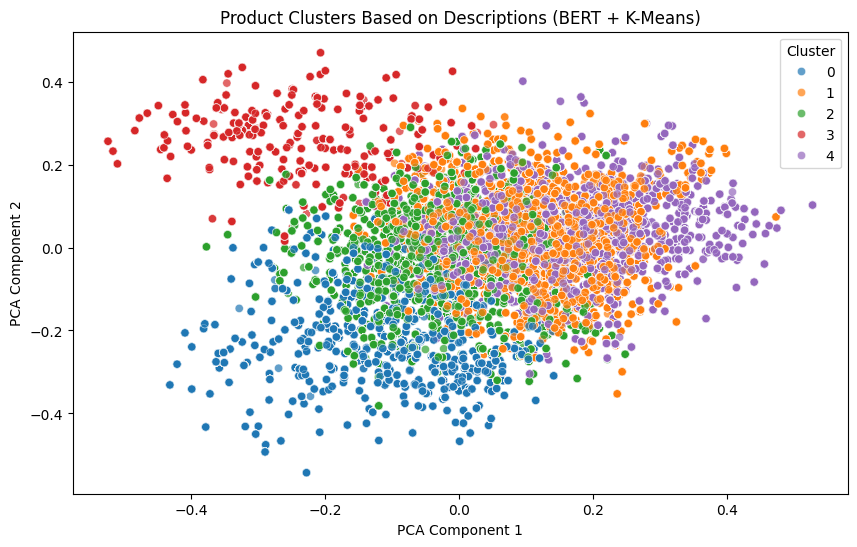

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

# Load dataset (assuming df is preloaded, replace with actual file path if needed)
df = pd.read_csv("../data/data_with_clusters_no_returns.csv")  
# Drop missing descriptions
df = df.dropna(subset=['Description'])


In [6]:
# Load dataset (assuming df is preloaded, replace with actual file path if needed)
df = pd.read_csv("../data/data_with_clusters_no_returns.csv")  
# Drop missing descriptions
df = df.dropna(subset=['Description'])

# Use a pre-trained BERT model for text embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
descriptions = df['Description'].astype(str).tolist()
description_embeddings = model.encode(descriptions, show_progress_bar=True)

Batches:   0%|          | 0/12436 [00:00<?, ?it/s]

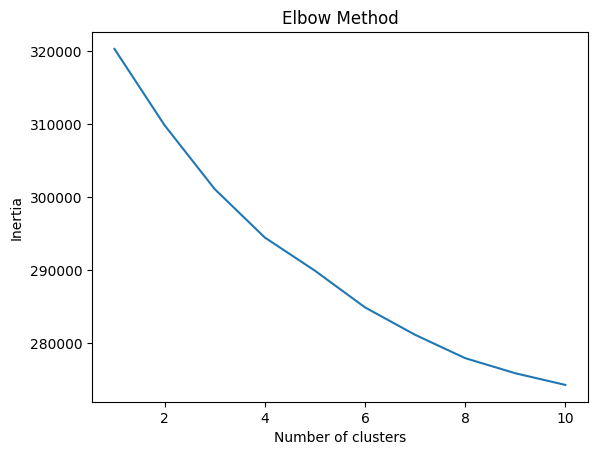

In [8]:
# Use elbow method to determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(description_embeddings)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



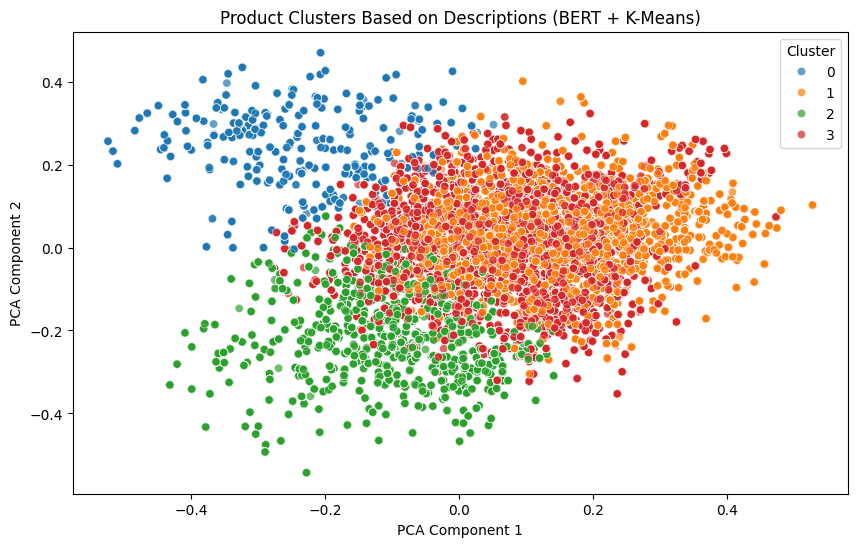

In [9]:
# Apply K-Means clustering
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(description_embeddings)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(description_embeddings)
df['PCA1'], df['PCA2'] = reduced_embeddings[:, 0], reduced_embeddings[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='tab10', alpha=0.7)
plt.title('Product Clusters Based on Descriptions (BERT + K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [10]:
# Lets explore each cluster
for cluster in range(num_clusters):
    print(f'Cluster {cluster}:')
    print(df[df['Cluster'] == cluster]['Description'].head(5))
    print('\n')

    

Cluster 0:
35                SPACEBOY LUNCH BOX 
36            LUNCH BOX I LOVE LONDON
37           CIRCUS PARADE LUNCH BOX 
38    CHARLOTTE BAG DOLLY GIRL DESIGN
86            JUMBO BAG PINK POLKADOT
Name: Description, dtype: object


Cluster 1:
0     WHITE HANGING HEART T-LIGHT HOLDER
2         CREAM CUPID HEARTS COAT HANGER
4         RED WOOLLY HOTTIE WHITE HEART.
7                 HAND WARMER UNION JACK
12     FELTCRAFT PRINCESS CHARLOTTE DOLL
Name: Description, dtype: object


Cluster 2:
5           SET 7 BABUSHKA NESTING BOXES
10            POPPY'S PLAYHOUSE BEDROOM 
11             POPPY'S PLAYHOUSE KITCHEN
14    BOX OF 6 ASSORTED COLOUR TEASPOONS
15         BOX OF VINTAGE JIGSAW BLOCKS 
Name: Description, dtype: object


Cluster 3:
1                    WHITE METAL LANTERN
3    KNITTED UNION FLAG HOT WATER BOTTLE
6      GLASS STAR FROSTED T-LIGHT HOLDER
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object




/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_22682/1394834234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')


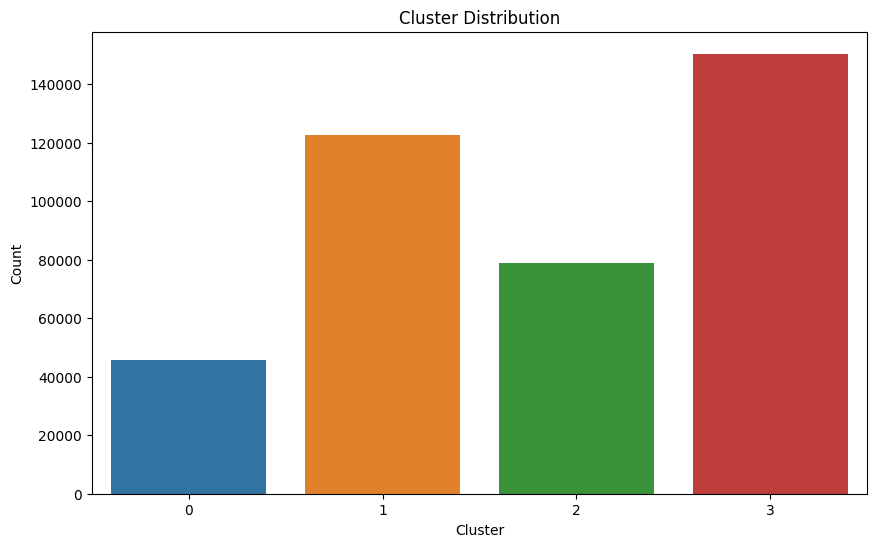

In [ ]:
# Lets plot the 